In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import scipy.io
import copy

from mpl_toolkits import mplot3d
from scipy.fft import fft, ifft, fft2, ifft2, fftshift, fftn, ifftn

In [8]:
cwd = os.getcwd()
SoundClip = scipy.io.loadmat('CP2_SoundClip.mat')['y'].T[0]
w = int(len(SoundClip.T)/4)
Fs = 44100

In [9]:
S1 = SoundClip[(1-1)*w : 1*w]
S2 = SoundClip[(2-1)*w : 2*w]
S3 = SoundClip[(3-1)*w : 3*w]
S4 = SoundClip[(4-1)*w : 4*w]

In [10]:
L = len(S1)/ Fs
n = len(S1)
t = np.arange(0, L , 1/Fs)
tau = np.arange(0, L, 0.1)
k = 2*np.pi *(1/L/2)* np.concatenate((np.arange(0, n/2-1+1), np.arange(-n/2,-1+1)))
ks = np.fft.fftshift(k)
Sgt_spec = np.zeros((len(ks),len(tau)))

In [12]:
n

484560

In [ ]:
##S1 spectrogram

a = 400
S1gt_spec = np.zeros((len(ks),len(tau)))
for i in range(len(tau)):
    g = np.exp(-a*(t-tau[i])**2)
    S1g = g*S1
    S1gt = np.fft.fft(S1g)
    
    loc_i = np.argmax(np.abs(S1gt)[0:1800])
    max_k = np.abs(k[loc_i])
    
    filter_g = np.exp(-(1/L)*(np.abs(k)-max_k)**2)
    filter_S1g = filter_g*S1gt
    S1gt_spec[:,i] = np.fft.fftshift(np.abs(filter_S1g))


A1 = copy.copy(S1gt_spec)
log_spec1 = np.log(S1gt_spec+1)

In [ ]:
##S2 spectrogram

a = 400
S2gt_spec = np.zeros((len(ks),len(tau)))

for i in range(len(tau)):
    g = np.exp(-a*(t-tau[i])**2)
    S2g = g*S2
    S2gt = np.fft.fft(S2g)
    
    loc_i = np.argmax(np.abs(S2gt)[0:1800])
    max_k = np.abs(k[loc_i])
    
    filter_g = np.exp(-(1/L)*(np.abs(k)-max_k)**2)
    filter_S2g = filter_g*S2gt
    S2gt_spec[:,i] = np.fft.fftshift(np.abs(filter_S2g))
    

A2 = copy.copy(S2gt_spec)
log_spec2 = np.log(S2gt_spec+1)

In [ ]:
##S3 spectrogram

a = 400
S3gt_spec = np.zeros((len(ks),len(tau)))

for i in range(len(tau)):
    g = np.exp(-a*(t-tau[i])**2)
    S3g = g*S3
    S3gt = np.fft.fft(S3g)
    
    loc_i = np.argmax(np.abs(S3gt)[0:1800])
    max_k = np.abs(k[loc_i])
    
    filter_g = np.exp(-(1/L)*(np.abs(k)-max_k)**2)
    filter_S3g = filter_g*S3gt
    S3gt_spec[:,i] = np.fft.fftshift(np.abs(filter_S3g))
    
A3 = copy.copy(S3gt_spec)
log_spec3 = np.log(S3gt_spec+1)

In [ ]:
##S4 spectrogram

a = 400
S4gt_spec = np.zeros((len(ks),len(tau)))

for i in range(len(tau)):
    g = np.exp(-a*(t-tau[i])**2)
    S4g = g*S4
    S4gt = np.fft.fft(S4g)
    
    loc_i = np.argmax(np.abs(S4gt)[0:1800])
    max_k = np.abs(k[loc_i])
    
    filter_g = np.exp(-(1/L)*(np.abs(k)-max_k)**2)
    filter_S4g = filter_g*S4gt
    S4gt_spec[:,i] = np.fft.fftshift(np.abs(filter_S4g))
    
A4 = copy.copy(S4gt_spec)
log_spec4 = np.log(S4gt_spec+1)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(17,15))
axs[0, 0].pcolormesh(tau,ks,log_spec1, cmap = 'hot')
axs[0, 0].set_title("Spectrogram S1")
axs[0, 0].set_ylim(0, 700)
axs[1, 0].pcolormesh(tau,ks,log_spec2, cmap = 'hot')
axs[1, 0].set_title("Spectrogram S2")
axs[1, 0].set_ylim(0, 700)
axs[0, 1].pcolormesh(tau,ks,log_spec3, cmap = 'hot')
axs[0, 1].set_title("Spectrogram S3")
axs[0, 1].set_ylim(0, 700)
axs[1, 1].pcolormesh(tau,ks,log_spec4, cmap = 'hot')
axs[1, 1].set_title("Spectrogram S4")
axs[1, 1].set_ylim(0, 700)
fig.suptitle('Spectrogram for Four Different Windows', fontsize='x-large',fontweight = 'bold')

fig.text(0.5, 0, 'time (t)', ha='center',fontsize='x-large',fontweight = 'bold')
fig.text(0, 0.5, 'frequency (k)', va='center', rotation='vertical',fontsize='x-large',fontweight = 'bold')
fig.colorbar(axs[0, 0].pcolormesh(tau,ks,log_spec1, cmap = 'hot'), ax=axs.ravel().tolist())
plt.savefig('spec.png',dpi=600)  
plt.show()

In [17]:
%run A5_A6.py

In [6]:
len(t)

1938240

In [ ]:
pip install simpleaudio

In [ ]:
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.ones(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [ ]:
bassline.shape

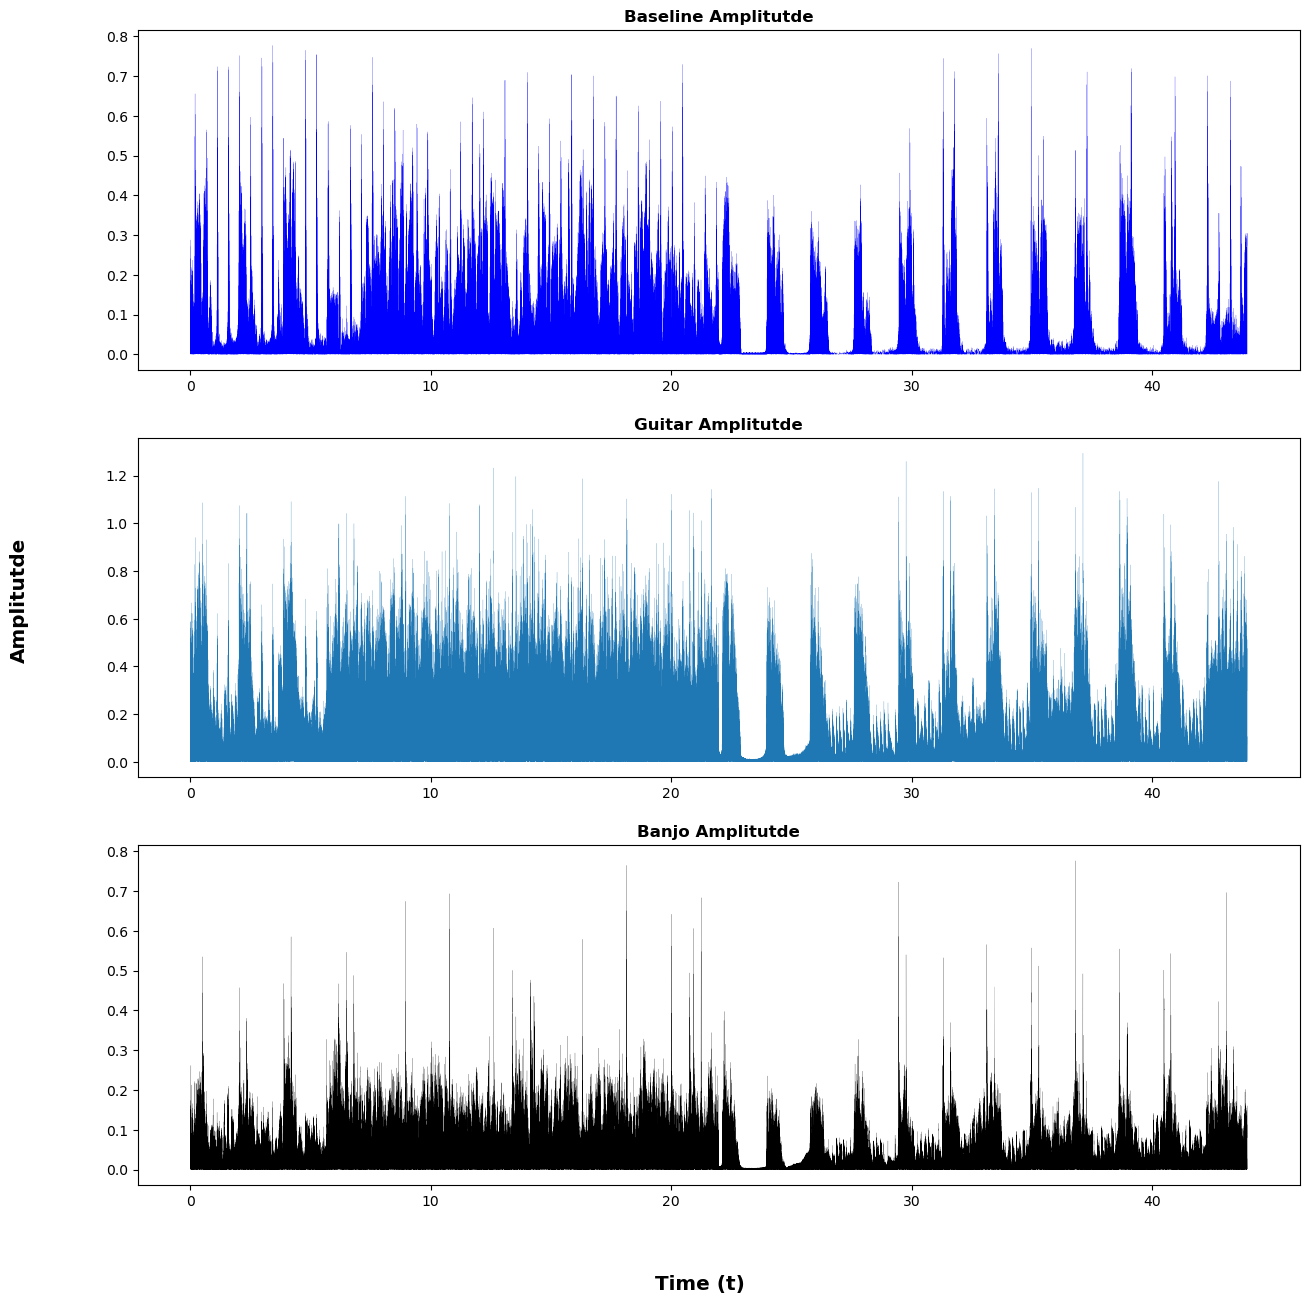

In [16]:
fig, axs = plt.subplots(3,figsize = (15,15), sharex=False, sharey=False)
axs[0].plot(t, bassline,linewidth = 0.1, c='#0000FF')
axs[0].set_title('Baseline Amplitutde',fontweight = 'bold')
axs[1].plot(t, guitar,linewidth = 0.1)
axs[1].set_title('Guitar Amplitutde',fontweight = 'bold')
axs[2].plot(t, banjo,linewidth = 0.1, c = '#000000')
axs[2].set_title('Banjo Amplitutde',fontweight = 'bold')
fig.text(0.5, 0.04, 'Time (t)', ha='center',fontsize='x-large',fontweight = 'bold')
fig.text(0.04, 0.5, 'Amplitutde', va='center', rotation='vertical',fontsize='x-large',fontweight = 'bold')
plt.savefig('amplitude.png',dpi=600)  
plt.show()